In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#https://www.kaggle.com/code/nguyncaoduy/twitter-sentiment-analysis-roberta-96-accuracy/input?select=twitter_training.csv

In [2]:
train_df = pd.read_csv("twitter_training.csv",
                       names=["id", "entity", "sentiment", "text"])
train_df.head()

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
# Display the results
#print(df)

#https://www.kaggle.com/code/nguyncaoduy/twitter-sentiment-analysis-roberta-96-accuracy/input?select=twitter_validation.csv

In [4]:
test_df = pd.read_csv("twitter_validation.csv", 
                     names=["id", "entity", "sentiment", "text"])
test_df.head()

,id,entity,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [5]:
train_df.isna().sum()

id             0
entity         0
sentiment      0
text         686
dtype: int64

In [6]:
test_df.isna().sum()

id           0
entity       0
sentiment    0
text         0
dtype: int64

In [7]:
# Drop na rows from train_df
train_df = train_df.dropna()

In [8]:
#train_df = train_df[:5000]
train_df = train_df[:1000]

In [9]:
# Data size
print(f"Training set: {len(train_df)} rows")
print(f"Test set: {len(test_df)} rows")

Training set: 1000 rows
Test set: 1000 rows


C:\Users\fahad\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


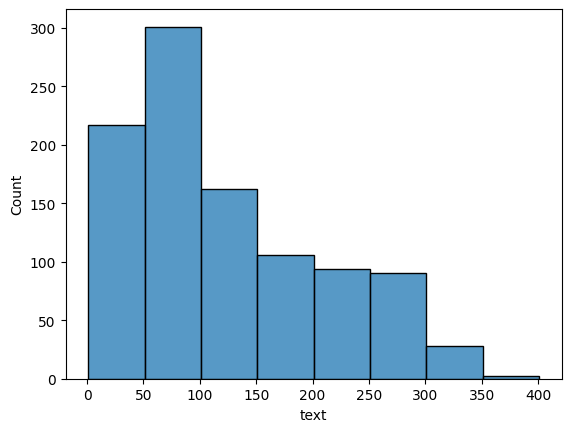

In [10]:
# Distribution of the text length
sns.histplot(train_df["text"].str.len(), binwidth=50)
plt.show()

In [11]:
# Sample of tweets from each class
sample_size = 3
train_df.groupby('sentiment').apply(lambda x: x.sample(sample_size))

C:\Users\fahad\AppData\Local\Temp\ipykernel_38188\1829390417.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df.groupby('sentiment').apply(lambda x: x.sample(sample_size))


id       entity   sentiment  \
sentiment                                       
Irrelevant 672  2519  Borderlands  Irrelevant   
           576  2500  Borderlands  Irrelevant   
           567  2498  Borderlands  Irrelevant   
Negative   875  2554  Borderlands    Negative   
           522  2490  Borderlands    Negative   
           848  2550  Borderlands    Negative   
Neutral    940  2566  Borderlands     Neutral   
           919  2563  Borderlands     Neutral   
           91   2416  Borderlands     Neutral   
Positive   720  2527  Borderlands    Positive   
           956  2570  Borderlands    Positive   
           993  2576  Borderlands    Positive   

                                                             text  
sentiment                                                          
Irrelevant 672     My h0rny friend is also a fantastic artist 🥰🥰🥰  
           576  Top 4 favourite games you say? 🤔. . Sea of Thi...  
           567  RhandlerR My homage to a friend, a warrior of ...  
Negative   875                                                you  
           522  My most despised area in Borderlands 1 is now ...  
           848  @ Borderlands I have some misgivings about the...  
Neutral    940  Sky Rocket > a SuperBadass or Caustic for Goli...  
           919  The @ jackothyzine is my first fan to do Borde...  
           91   I hate that this simple Chaos Modifier event o...  
Positive   720  Watching You Kalloori Perfect Situation Mystic...  
           956  Last year I had the legitimate pleasure of wor...  
           993                                              Sweet

In [12]:
# Create a mapping of labels to numbers
labels = list(train_df['sentiment'].unique())
id2label = {k:v for k,v in enumerate(labels)}
label2id = {v:k for k,v in enumerate(labels)}
print(labels)
print(id2label)
print(label2id)

['Positive', 'Neutral', 'Negative', 'Irrelevant']
{0: 'Positive', 1: 'Neutral', 2: 'Negative', 3: 'Irrelevant'}
{'Positive': 0, 'Neutral': 1, 'Negative': 2, 'Irrelevant': 3}


In [13]:
train_df['label'] = train_df['sentiment'].map(label2id)
test_df['label'] = test_df['sentiment'].map(label2id)

train_df.head()

,id,entity,sentiment,text,label
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0


# Sentiment Analysis
Using Hugging Face Transformers

In [14]:
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

### Loading dataset

In [15]:
# Split train_df into 90% training + 10% validation

train = train_df.sample(frac=0.9, random_state=42)
valid = train_df.drop(train.index)

In [16]:
train

,id,entity,sentiment,text,label
522,2490,Borderlands,Negative,My most despised area in Borderlands 1 is now ...,2
740,2531,Borderlands,Positive,Enjoying my Borderlands 3 Tubbz in the sun @ N...,0
743,2531,Borderlands,Positive,to the Borderlands 3 Tubbz out in the sun @Num...,0
663,2517,Borderlands,Positive,Actually. I think borderlands 3 might be a 5th...,0
412,2469,Borderlands,Positive,"Perfect casting for first Lilith, most anticip...",0
...,...,...,...,...,...
252,2443,Borderlands,Neutral,Slutty mechanic... Im im...,1
729,2528,Borderlands,Negative,Capitalism on Political Borderlands,2
462,2478,Borderlands,Positive,Lil preview of a Maya drawing I've been chippi...,0
456,2477,Borderlands,Neutral,does fall damage canonically exist in the bord...,1


In [17]:
from datasets import Dataset

In [18]:
train_ds = Dataset.from_pandas(train)
valid_ds = Dataset.from_pandas(valid)
test_ds = Dataset.from_pandas(test_df)

train_ds, valid_ds, test_ds

(Dataset({
     features: ['id', 'entity', 'sentiment', 'text', 'label', '__index_level_0__'],
     num_rows: 900
 }),
 Dataset({
     features: ['id', 'entity', 'sentiment', 'text', 'label', '__index_level_0__'],
     num_rows: 100
 }),
 Dataset({
     features: ['id', 'entity', 'sentiment', 'text', 'label'],
     num_rows: 1000
 }))

In [19]:
train_ds['text'][0]

'My most despised area in Borderlands 1 is now the Rust Commons area. . So many sidequests'

### Preprocessing

In [20]:
# Dynamic Padding
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

In [21]:
# Evaluate using accuracy
from datasets import load_metric

accuracy = load_metric('accuracy', trust_remote_code=True)

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

C:\Users\fahad\AppData\Local\Temp\ipykernel_38188\2251288920.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  accuracy = load_metric('accuracy', trust_remote_code=True)


In [22]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True, max_length=128)

train_ds = train_ds.map(preprocess_function, batched=True)
valid_ds = valid_ds.map(preprocess_function, batched=True)
test_ds = test_ds.map(preprocess_function, batched=True)

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [23]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

### Training DataSet

In [24]:
# To avoid some warnings on notebook
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [25]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    model_name, num_labels=len(labels), id2label=id2label, label2id=label2id, 
    ignore_mismatched_sizes=True, # The model was pretrained with 3 labels, but our dataset has 4 labels (a new head with random weights will be initialized)
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
#pip install accelerate -U

In [27]:
# Adapted from https://huggingface.co/docs/transformers/tasks/sequence_classification
training_args = TrainingArguments(
    output_dir="twitter-sentiment-detector",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

C:\Users\fahad\anaconda3\Lib\site-packages\transformers\training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [28]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=valid_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.964574,0.610000
2,No log,0.735035,0.690000
3,No log,0.553663,0.800000
4,No log,0.360940,0.890000
5,No log,0.276912,0.910000
6,No log,0.325162,0.910000
7,No log,0.320119,0.890000
8,No log,0.310273,0.900000
9,No log,0.362517,0.900000
10,No log,0.355029,0.900000


TrainOutput(global_step=290, training_loss=0.24600885325464708, metrics={'train_runtime': 6549.1451, 'train_samples_per_second': 1.374, 'train_steps_per_second': 0.044, 'total_flos': 369521446040448.0, 'train_loss': 0.24600885325464708, 'epoch': 10.0})

## Evaluate on test set

In [29]:
predictions = trainer.predict(test_ds)
preds = np.argmax(predictions.predictions, axis=-1)
accuracy.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.568}

### Inference

In [30]:
texts = [
    "Another day, another “I feel like I’m being followed” experience.",
    "HAPPY SAINT PATRICK'S DAY! I'M A BIG FAN OF SAINT PATRICK'S DAY, I'M ALSO A BIG FAN OF GREEN THINGS, WHO WOULDN'T BE? :D"
]

In [31]:
inputs = tokenizer(texts, return_tensors="pt", padding=True)
model = model.to('cpu') # put model to cpu
logits = model(**inputs).logits
print([model.config.id2label[item.item()] for item in logits.argmax(axis=-1)])

['Negative', 'Positive']
